In [23]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import yfinance as yf


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [34]:
# Define the ticker symbol for Tesla
ticker = 'AAPL'

# Fetch the data using yfinance
data = yf.download(ticker)

# Print the fetched data
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200
2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700
2024-06-28,215.770004,216.070007,210.300003,210.619995,210.619995,82542700


In [35]:
data = data['2023-07-01':'2024-07-01']

In [16]:
data['2023-07-01':'2024-07-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-03,193.779999,193.880005,191.759995,192.460007,191.443298,31458200
2023-07-05,191.570007,192.979996,190.619995,191.330002,190.319260,46920300
2023-07-06,189.839996,192.020004,189.199997,191.809998,190.796722,45094300
2023-07-07,191.410004,192.669998,190.240005,190.679993,189.672684,46778000
2023-07-10,189.259995,189.990005,187.039993,188.610001,187.613632,59922200
...,...,...,...,...,...,...
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200
2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700


<Axes: xlabel='Date'>

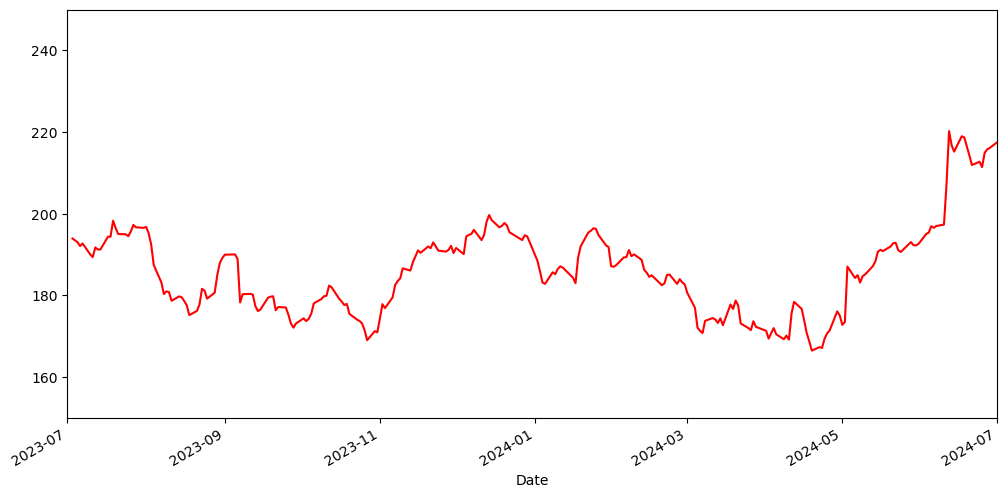

In [69]:
data['High'].plot(xlim=['2023-07-01','2024-07-01'],ylim=[150,250],figsize=(12,6),c='red')

AIC:  873.5026352045015
BIC:  903.1874915034339
RMSE:  18.984439737370337


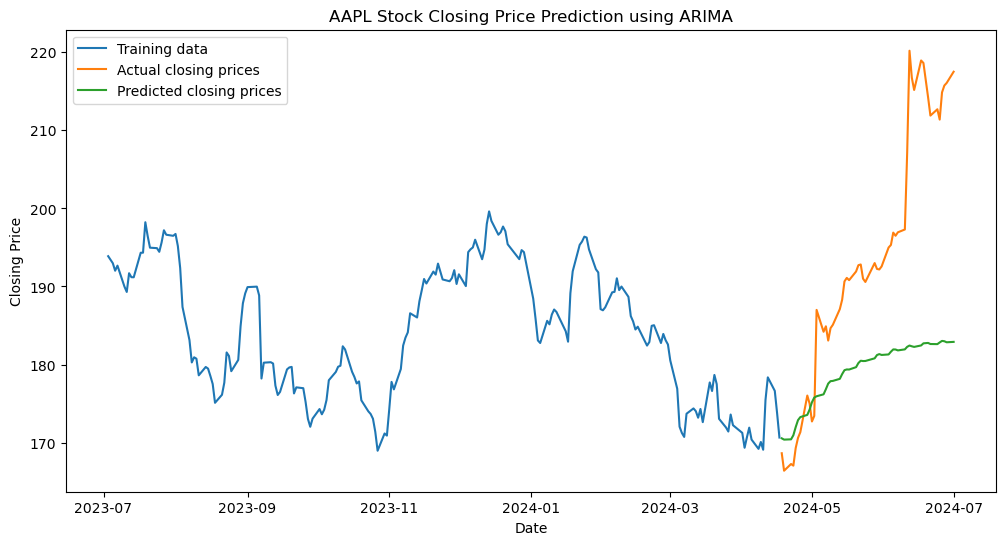

In [76]:

# Select the closing prices
closing_prices = data["High"]['2023-07-01':'2024-07-01']

# Split the data into training and testing sets
train_data = closing_prices[:int(len(closing_prices) * 0.8)]
test_data = closing_prices[int(len(closing_prices) * 0.8):]

# Fit the ARIMA model
model = ARIMA(train_data, order=(5, 0, 2))
model_fit = model.fit()

# Print AIC and BIC values
print("AIC: ", model_fit.aic)
print("BIC: ", model_fit.bic)

# Forecast the stock prices using the ARIMA model
forecast = model_fit.forecast(steps=len(test_data))

# Calculate the root mean squared error (RMSE)
rmse = sqrt(mean_squared_error(test_data, forecast))
print("RMSE: ", rmse)

# Plot the actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Training data")
plt.plot(test_data, label="Actual closing prices")
plt.plot(test_data.index, forecast, label="Predicted closing prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{ticker} Stock Closing Price Prediction using ARIMA")
plt.legend()
plt.show()

Best ARIMA order: (1, 2, 1)
AIC:  866.1713751344361
BIC:  876.0361762265196
RMSE:  31.892176582563746


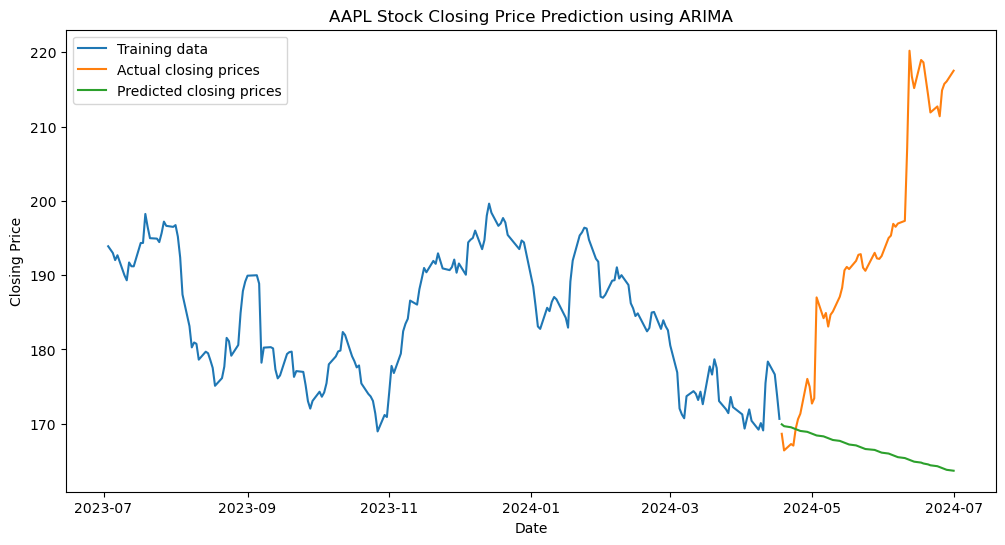

In [78]:
from math import sqrt
import itertools
# Select the closing prices
closing_prices = data["High"]['2023-07-01':'2024-07-01']

# Split the data into training and testing sets
train_data = closing_prices[:int(len(closing_prices) * 0.8)]
test_data = closing_prices[int(len(closing_prices) * 0.8):]

# Grid search to find the optimal ARIMA parameters
p_values = range(0, 6)
d_values = range(2, 5)
q_values = range(0, 5)
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

best_aic = float("inf")
best_order = None
best_model = None

for order in pdq_combinations:
    try:
        model = ARIMA(train_data, order=order)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order = order
            best_model = model_fit
    except Exception as e:
        print(f"Error fitting ARIMA model with order {order}")

print(f"Best ARIMA order: {best_order}")
print("AIC: ", best_aic)
print("BIC: ", best_model.bic)

# Forecast the stock prices using the best ARIMA model
forecast = best_model.forecast(steps=len(test_data))

# Calculate the root mean squared error (RMSE)
rmse = sqrt(mean_squared_error(test_data, forecast))
print("RMSE: ", rmse)

# Plot the actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Training data")
plt.plot(test_data, label="Actual closing prices")
plt.plot(test_data.index, forecast, label="Predicted closing prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{ticker} Stock Closing Price Prediction using ARIMA")
plt.legend()
plt.show()


In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, LSTM
# Select the closing prices
closing_prices = data["Close"]['2023-07-01':'2024-07-01']

# Preprocessing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices.values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:, :]
test_data_index = closing_prices[train_size:].index

# Function to create time series dataset for LSTM
def create_dataset(dataset, window_size=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - window_size - 1):
        data_x.append(dataset[i:(i + window_size), 0])
        data_y.append(dataset[i + window_size, 0])
    return np.array(data_x), np.array(data_y)

# Create the time series dataset for LSTM
window_size = 5
train_x, train_y = create_dataset(train_data, window_size)
test_x, test_y = create_dataset(test_data, window_size)

# Reshape the input to be [samples, time steps, features]
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, window_size)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model
model.fit(train_x, train_y, epochs=100, batch_size=1, verbose=0)

# Make predictions using the LSTM model
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

# Invert the predictions
train_predict = scaler.inverse_transform(train_predict)
train_y = scaler.inverse_transform([train_y])
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])

# Calculate the root mean squared error (RMSE) for LSTM
test_rmse = sqrt(mean_squared_error(test_y[0], test_predict[:, 0]))
print("LSTM Test RMSE: ", test_rmse)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step
LSTM Test RMSE:  3.4871100663102483


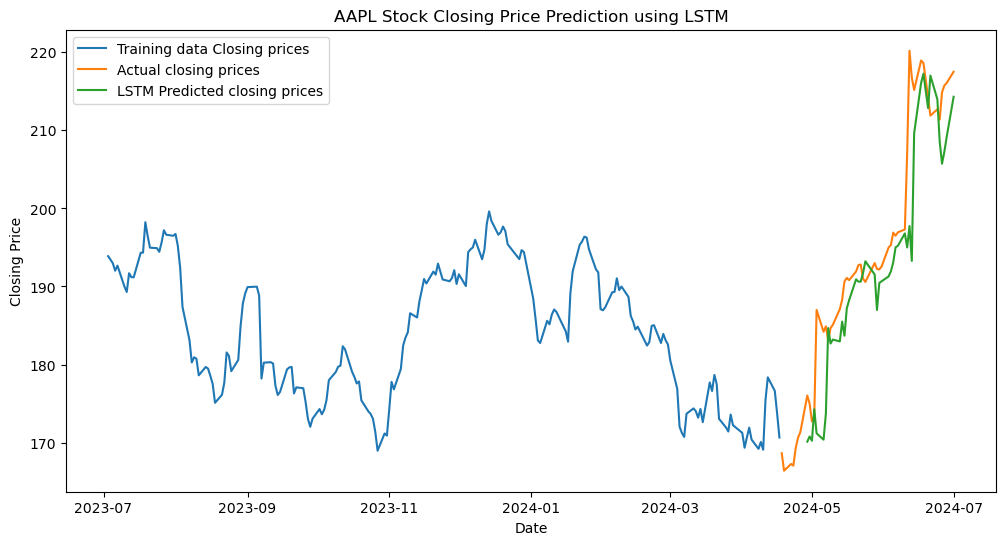

In [71]:

# Plot the actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(closing_prices[:-len(test_data_index)], label="Training data Closing prices")
plt.plot(closing_prices[-len(test_data_index):], label="Actual closing prices")
plt.plot(test_data_index[7:], test_predict[:-1], label="LSTM Predicted closing prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{ticker} Stock Closing Price Prediction using LSTM")
plt.legend()
plt.show()

In [40]:
from statsmodels.tsa.stattools import adfuller

closing_prices = data["Close"]['2023-07-01':'2024-07-01']

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
        
adf_test(closing_prices)        

ADF Statistics: -0.9661567505468345
p- value: 0.7654069068440867
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [61]:
data['Close-shift5']=data['Close']- data['Close'].shift(5)

In [37]:
data

,Open,High,Low,Close,Adj Close,Volume,Close-shift1
Date,,,,,,,
2023-07-03,193.779999,193.880005,191.759995,192.460007,191.443314,31458200,NaN
2023-07-05,191.570007,192.979996,190.619995,191.330002,190.319260,46920300,-1.130005
2023-07-06,189.839996,192.020004,189.199997,191.809998,190.796722,45094300,0.479996
2023-07-07,191.410004,192.669998,190.240005,190.679993,189.672684,46778000,-1.130005
2023-07-10,189.259995,189.990005,187.039993,188.610001,187.613632,59922200,-2.069992
...,...,...,...,...,...,...,...
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900,0.930008
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200,4.179993
2024-06-27,214.690002,215.740005,212.350006,214.100006,214.100006,49772700,0.850006


In [38]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Close-shift1    1
dtype: int64

In [62]:
adf_test(data['Close-shift5'].dropna())

ADF Statistics: -3.1039720088473315
p- value: 0.026260635063840573
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [44]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

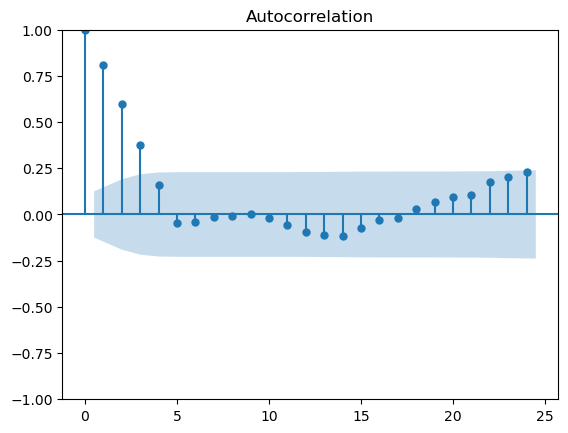

In [63]:
acf = plot_acf(data['Close-shift5'].dropna())
#p=5

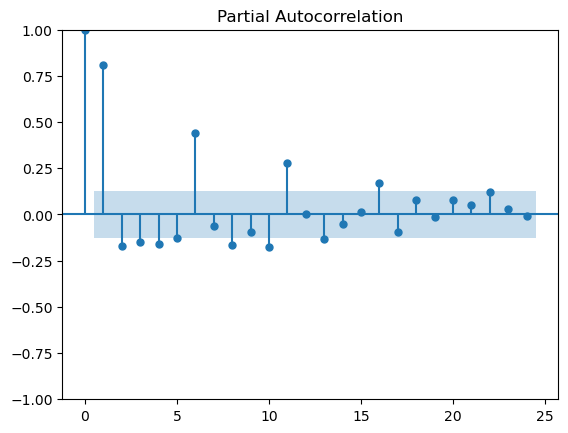

In [65]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
pacf12 = plot_pacf(data['Close-shift5'].dropna())
#q=2

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27743D+03    |proj g|=  2.89702D+03


 This problem is unconstrained.



At iterate    5    f=  2.72841D+00    |proj g|=  2.87049D-01

At iterate   10    f=  2.29475D+00    |proj g|=  8.68198D-02

At iterate   15    f=  2.23598D+00    |proj g|=  1.32658D-02

At iterate   20    f=  2.23318D+00    |proj g|=  4.30388D-03

At iterate   25    f=  2.23263D+00    |proj g|=  7.44883D-03

At iterate   30    f=  2.23244D+00    |proj g|=  2.55618D-03

At iterate   35    f=  2.23138D+00    |proj g|=  1.12547D-02

At iterate   40    f=  2.23121D+00    |proj g|=  3.24942D-03

At iterate   45    f=  2.23108D+00    |proj g|=  9.62755D-03

At iterate   50    f=  2.23093D+00    |proj g|=  2.08530D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

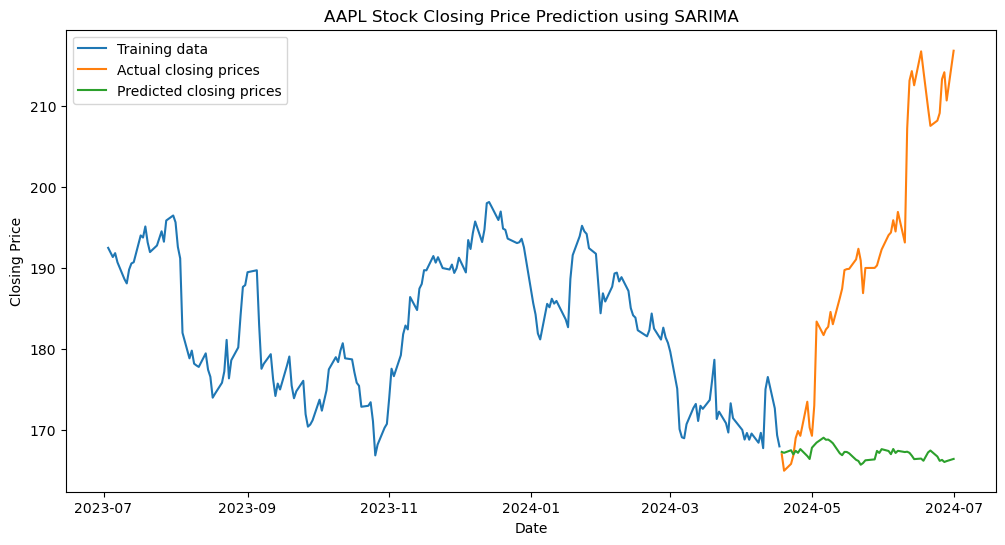

In [80]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Select the closing prices
closing_prices = data["Close"]

# Split the data into training and testing sets
train_data = closing_prices[:int(len(closing_prices) * 0.8)]
test_data = closing_prices[int(len(closing_prices) * 0.8):]

# Fit the ARIMA model
model=SARIMAX(train_data,order=(5,0,2),seasonal_order=(2,0,5,12))
model_fit = model.fit()

# Print AIC and BIC values
print("AIC: ", model_fit.aic)
print("BIC: ", model_fit.bic)

# Forecast the stock prices using the ARIMA model
forecast = model_fit.forecast(steps=len(test_data))

# Calculate the root mean squared error (RMSE)
rmse = sqrt(mean_squared_error(test_data, forecast))
print("RMSE: ", rmse)

# Plot the actual vs. predicted closing prices
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Training data")
plt.plot(test_data, label="Actual closing prices")
plt.plot(test_data.index, forecast, label="Predicted closing prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{ticker} Stock Closing Price Prediction using SARIMA")
plt.legend()
plt.show()